In [ ]:
!wget -q http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar

In [ ]:
!tar -xvf VOCtrainval_06-Nov-2007.tar > /dev/null; echo " done."

 done.


In [ ]:
!wget -q https://github.com/AbhishekMahato636/Computer-Vision-Projects/blob/master/multi.csv

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing import image

In [ ]:
df = pd.read_pickle("multi.csv")
df.head(20)

,fn,cat_id
0,000012.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
1,000017.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,000023.jpg,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,000026.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
4,000032.jpg,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,000033.jpg,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,000034.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,000035.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,000036.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,000042.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
voc_classes = ['Aeroplane', 'Bicycle', 'Bird', 'Boat', 'Bottle',
               'Bus', 'Car', 'Cat', 'Chair', 'Cow', 'Diningtable',
               'Dog', 'Horse','Motorbike', 'Person', 'Pottedplant',
               'Sheep', 'Sofa', 'Train', 'Tvmonitor']
len(voc_classes)

20

In [ ]:
x = []
y = []
for i in range(df.shape[0]):
  img_path = "/content/VOCdevkit/VOC2007/JPEGImages/"+df['fn'][i]
  img = image.load_img(img_path,target_size=(200,200))
  img = image.img_to_array(img)
  x.append(img)
  y.append(df['cat_id'][i])

x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(2501, 200, 200, 3)
(2501, 20)


In [ ]:
import pickle
f = open("images.p","wb")
pickle.dump(x,f)
f.close()

In [ ]:
f = open("labels.p","wb")
pickle.dump(y,f)
f.close()

In [ ]:
#load the pickle files
f = open("images.p",'rb')
xd = pickle.load(f)
print(xd.shape)

(2501, 200, 200, 3)


In [ ]:
from tensorflow.keras import models,layers
input_layer = layers.Input(shape=(200,200,3))
resnet = resnet50.ResNet50(weights='imagenet',include_top=False,input_tensor=input_layer)

last_layer = resnet.layers[-1].output
flatten = layers.Flatten()(last_layer)
dropout = layers.Dropout(0.5)(flatten)
dense1 = layers.Dense(200,activation='relu')(dropout)
dropout2 = layers.Dropout(0.2)(dense1)
dense2 = layers.Dense(100,activation='relu')(dropout2)
output_layer = layers.Dense(20,activation='sigmoid')(dense2)

model = models.Model(inputs=input_layer,outputs=output_layer)

for layer in model.layers[:-5]:
  layer.trainable=False

model.summary()


Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x,y,verbose=True,epochs=10,batch_size=64,validation_split=0.2,shuffle=True)

Epoch 1/10
32/32 [==============================] - 7s 232ms/step - loss: 1.2402 - accuracy: 0.2195 - val_loss: 0.2474 - val_accuracy: 0.4611
Epoch 2/10
32/32 [==============================] - 6s 193ms/step - loss: 0.2438 - accuracy: 0.4460 - val_loss: 0.1831 - val_accuracy: 0.4631
Epoch 3/10
32/32 [==============================] - 6s 194ms/step - loss: 0.1641 - accuracy: 0.5175 - val_loss: 0.1735 - val_accuracy: 0.4750
Epoch 4/10
32/32 [==============================] - 6s 195ms/step - loss: 0.1231 - accuracy: 0.5780 - val_loss: 0.1627 - val_accuracy: 0.5050
Epoch 5/10
32/32 [==============================] - 6s 195ms/step - loss: 0.1031 - accuracy: 0.6385 - val_loss: 0.1703 - val_accuracy: 0.5210
Epoch 6/10
32/32 [==============================] - 6s 196ms/step - loss: 0.0797 - accuracy: 0.6735 - val_loss: 0.1770 - val_accuracy: 0.5210
Epoch 7/10
32/32 [==============================] - 6s 196ms/step - loss: 0.0707 - accuracy: 0.7000 - val_loss: 0.1789 - val_accuracy: 0.4870
Epoch 

In [ ]:
!wget -q http://www.horsefeedblog.com/wp-content/uploads/2010/06/walking-horse-and-dog.jpg

In [ ]:
!wget -q https://lifedesigncolorado.files.wordpress.com/2014/11/wood-run-10-19-erin-14.jpg

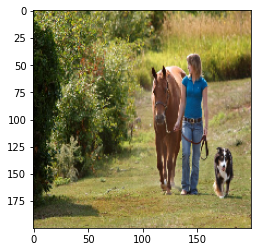

Top three  Person Horse Car


In [ ]:
def predict(img_name):
  img = image.load_img(img_name,target_size=(200,200))
  img = image.img_to_array(img)
  plt.imshow(img.astype('int32'))
  plt.show()
  prediction = model.predict(img.reshape(1,200,200,3))
  output = np.argsort(prediction)[0]
  print("Top three ",voc_classes[output[-1]],voc_classes[output[-2]],voc_classes[output[-3]])
  #return output



predict("walking-horse-and-dog.jpg")